In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## Differentiability
Even if a function is continuous and all of its directional derivatives exist, this does not guarantee that the function has a total derivative (gradient). For example, consider the function:
$$
f(x,y) = \frac{x^3}{x^2 + y^2}
$$
The directional derivatives of this function exist everywhere. $f_x(0,0)$ and $f_y(0,0)$ then we can form a linear approximation to $f$, which we'll call $g_1$:
$$
g_1(x,y) = f(0,0) + f_x(0, 0) (x-0) + f_y(0,0) (y-0)
$$
$$
  = f_x(0, 0)x + f_y(0, 0)y
$$
But we can also get a linear approximation using a different basis. For example, let $u =x+y$, and $f_u$ the directional derivative of $f$ in the $u$ direction. We can define the linear approximation $g_2$ as follows:
$$
 g_2(x,y) = f_x(0, 0)x + f_u(0, 0)u
$$

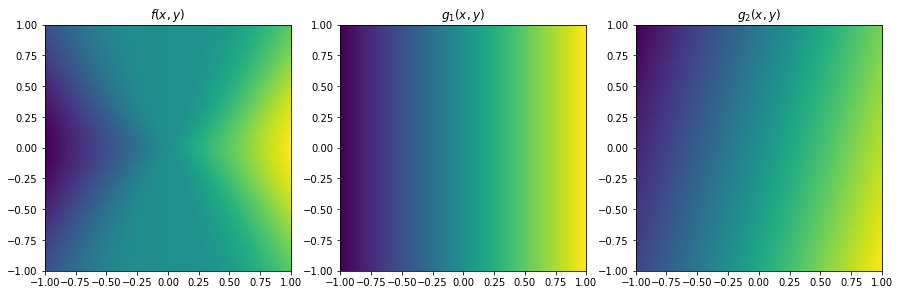

In [91]:
def f(x,y): return x**3/(x**2 + y**2)

h = 0.0001
f_x_0 = (f(h,0) - f(-h,0))/(2*h) 
f_y_0 = (f(0,h) - f(0,-h))/(2*h)
f_u_0 = (f(h,h) - f(-h,-h))/(2*np.sqrt(2)*h) 

def g1(x,y):
    return f_x_0 * x + f_y_0 *y

def g2(x,y):
    u = x+y
    return f_x_0 * x + f_u_0 * u 

plt.rcParams['figure.figsize'] = [15, 5]
x = y = np.linspace(-1,1,100)
xv,yv = np.meshgrid(x,y)

plt.subplot(1, 3, 1)
plt.title(r'$f(x,y)$')
plt.imshow(f(xv,yv),extent=([-1,1,-1,1]))

plt.subplot(1, 3, 2)
plt.title(r'$g_1(x,y)$')
plt.imshow(g1(xv,yv),extent=([-1,1,-1,1]))

plt.subplot(1, 3, 3)
plt.title(r'$g_2(x,y)$')
plt.imshow(g2(xv,yv),extent=([-1,1,-1,1]))
plt.show()

Clearly the two approximations are different functions. Furthermore, neither is close to the true function. The issue is that the directional derivatives at zero do not form a vector space (i.e. they don't add linearly). That is, in general:
$$
f_{s} \
\neq 
(s \cdot u)f_u  + (s \cdot v)f_v 
$$
What would happen if we tried to do PCA anyway, in spite of this bad behavior? In two dimensions, principle component analysis is easy. If the output variable $z=f(x,y)$ has a variance of $\sigma_z^2$, then the Fisher matrix is given by:
$$
F =
\begin{bmatrix}
           f_u \\
           f_v \\
\end{bmatrix}
\frac{1}{\sigma_z^2}
\begin{bmatrix}
           f_u & f_v\\
\end{bmatrix}
=
\frac{1}{\sigma_z^2}
\begin{bmatrix}
           f_u^2 & f_u f_v \\
           f_u f_v & f_v^2 \\
\end{bmatrix}
$$
It is easy to verify that the two eigenvectors are 
$\begin{bmatrix}
           f_u\\
           f_v\\
\end{bmatrix}$ and
$\begin{bmatrix}
           f_v\\
           -f_u\\
\end{bmatrix}$ with eigenvalues $(f_u^2 + f_v^2)/\sigma_z^2$ and $0$ respectively. These are just the gradient vector and its perpendicular.

When the object being operated on is a function, there are infinitely many directions in which the derivative can be taken. In this setting there is another way that differentiation can fail: It may be the case that the directional derivatives are a vector space under finite linear combinations, but not for inifinite summations. Consider the functional $F$:
$$
F[f] = \int_{0}^1 f'(x)^2 dx
$$
Suppose $f_0(x)$ is given by a truncated Fourier series of $M$ terms:
$$f_0(x) = a_0 + \sum_{n=1}^M a_n \cos(n \pi x) + b_n \sin(n \pi x)$$ where
\begin{align*}
a_n = \int_{-1}^1f_0(x)\cos(n\pi x)dx & & 
b_n = \int_{-1}^1f_0(x)\sin(n\pi x)dx 
\end{align*}
We can compute the derivative of $F$ with respect to $b_n$, evaluated at $f_0$:
$$
\left. \frac{d F[f]}{d b_n}\right|_{f_0} =\frac{d}{d b_n} \int_{0}^1 f'(x)^2 dx
$$
$$
=\frac{d}{d b_n} \int_{0}^1 \left(\sum_{n=1}^\infty - n \pi  a_n \sin(n \pi x) + n \pi b_n \cos(n \pi x) 
\right) ^2dx
$$
$$
=2 \pi n \int_{0}^1 \left(\sum_{n=1}^\infty - n \pi  a_n \sin(n \pi x) + n \pi b_n \cos(n \pi x) 
\right) \cos(n \pi x)dx
$$
$$
 = n^2 \pi^2 b_n
$$
Now let $s(x)$ denote the unit step function ($s(x) = 1$ if $x 
\in [0,1]$, $s(x) = 0$ if $x \in [-1,0)$). It is trivial to evaluate the derivative of $F$ in the $s$ direction (evaluated at $f(x)=f_0(x)$):
$$
\left. \frac{d F[f_0(x) + t s(x)]}{dt} \right|_{t=0} =
\frac{d}{dt}\int_{0}^1 0 dx  = 0
$$
Suppose that $F$ is Frechet differentiable. Then we have:
$$
\frac{dF}{dt} = 
 \sum_{n=1}^\infty \langle s(x),\sin(n \pi x) \rangle \frac{d F}{d b_n} 
 =\sum_{n=1}^\infty
 \int_{-1}^1 s(x) \sin(n \pi x) dx
  \frac{d F}{d b_n}
$$

$$= \frac{4}{\pi}\sum_{n=1,3,5}^\infty \frac{1}{n}\frac{d F}{d b_n} = 
4 \pi \sum_{n=1,3,5}^M n b_n$$

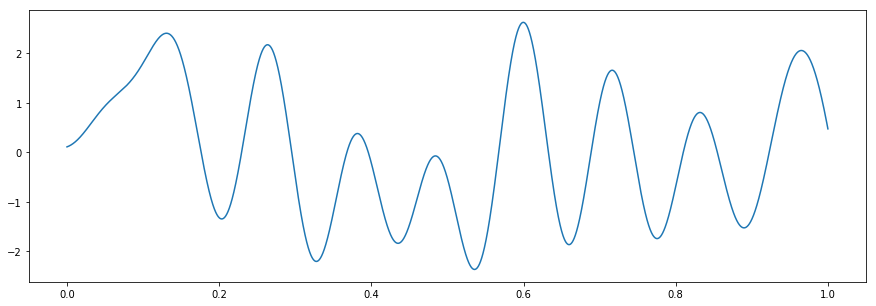

In [233]:
x = np.linspace(0,1,10000)
M = 20
N = 50

a = np.random.rand(M)-0.5
b = np.random.rand(M)-0.5
def f_0(x):
    c = np.sum([a[n] * np.cos(n * np.pi * x) for n in range(M)],axis=0)
    s = np.sum([b[n] * np.sin(n * np.pi * x) for n in range(M)],axis=0)
    return c + s

def F(f):
    df = np.gradient(f, x)
    return np.trapz(df**2, x)
plt.plot(x,f_0(x))

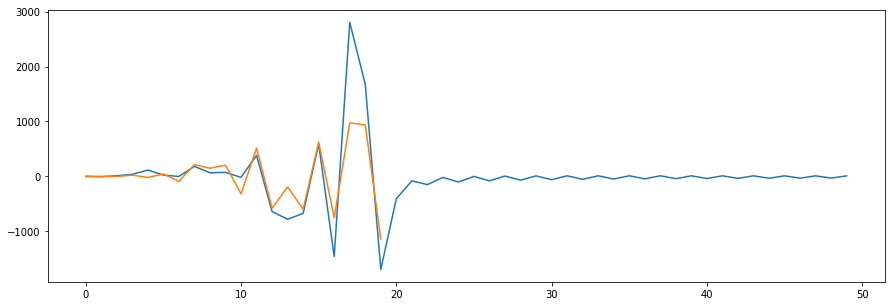

In [236]:
F_b = np.zeros(N)
ss = .001
f_fwd = f_0(x) + ss * np.sin(n * np.pi * x)
for n in range(N):
    f_fwd = f_0(x) + ss * np.sin(n * np.pi * x)
    f_bwd = f_0(x) - ss * np.sin(n * np.pi * x)
    F_b[n] = (F(f_fwd) - F(f_bwd))/(2*ss)
plt.plot(F_b)
plt.plot((np.arange(M))**2 * np.pi**2 *b)